# Setup

### Importacion de librerias

In [42]:
#Uso general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Lectura de datos

In [43]:
# Lectura de csv y creacion de dataframe
data = pd.read_csv("Estatura-peso_HyM.csv")
data.head()

,H_estat,H_peso,M_estat,M_peso
0,1.61,72.21,1.53,50.07
1,1.61,65.71,1.60,59.78
2,1.70,75.08,1.54,50.66
3,1.65,68.55,1.58,56.96
4,1.72,70.77,1.61,51.03


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   H_estat  220 non-null    float64
 1   H_peso   220 non-null    float64
 2   M_estat  220 non-null    float64
 3   M_peso   220 non-null    float64
dtypes: float64(4)
memory usage: 7.0 KB


# Limpieza de datos

### Creacion de dataframe a analizar
Se modificara el dataframe original para que se pueda utilizar con modelos de clasificacion

In [45]:
# Division de informacion por sexo
dataH = data.loc[:, ["H_estat", "H_peso"]]
dataH.columns = ["Estatura", "Peso"]
dataM = data.loc[:, ["M_estat", "M_peso"]]
dataM.columns = ["Estatura", "Peso"]

# Identificadores de sexo: 0 = Hombre, 1 = Mujer
dataH["Sexo"] = 0
dataM["Sexo"] = 1

# Union de ambos dataframes
df = pd.concat([dataH, dataM])

Revision de integridad de datos

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 219
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Estatura  440 non-null    float64
 1   Peso      440 non-null    float64
 2   Sexo      440 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 13.8 KB


# Analisis de datos

Analisis estadistico inicial 

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estatura,440.0,1.613341,0.069292,1.44,1.5600,1.61,1.660,1.80
Peso,440.0,63.970545,11.541615,37.39,54.4875,64.53,73.215,90.49
Sexo,440.0,0.500000,0.500569,0.00,0.0000,0.50,1.000,1.00


Distribucion de datos

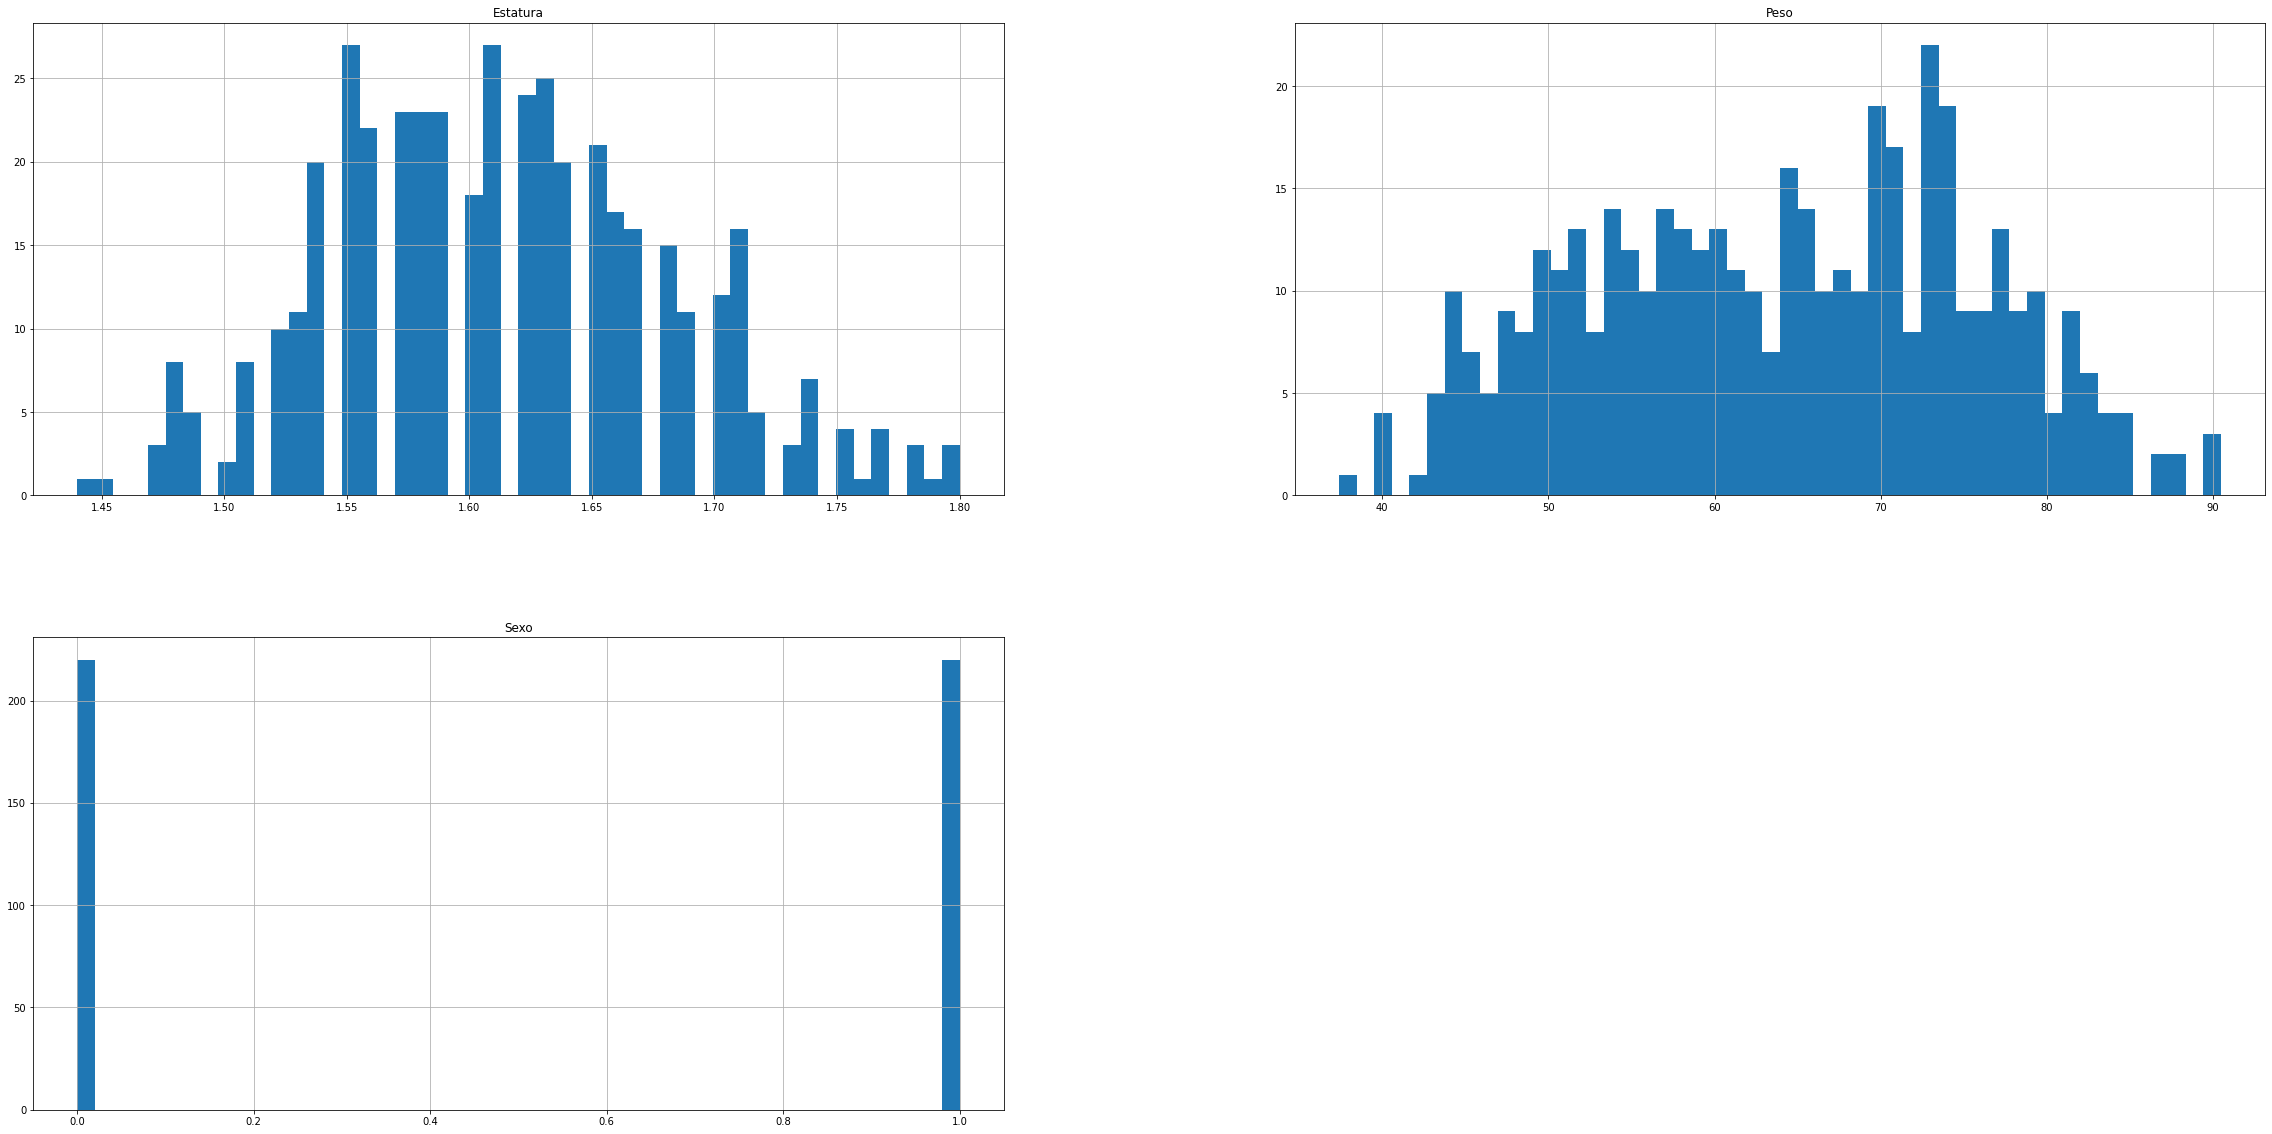

In [48]:
df.hist(bins=50, figsize=(40, 20))
plt.show()

# Entrenamiento de modelos

In [55]:
s = StandardScaler()

# Separacion de variable dependiente y variables independiantes
x = s.fit_transform(df.drop(columns="Sexo", axis=1))
y = df.Sexo.values

# Creacion de datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression()
}

# Entrenamiento de modelos
print("Accuracy Scores y Matrices de Confuncion:")
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{name}: {accuracy_score(y_test, y_pred)*100:.2f}%")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

Accuracy Scores y Matrices de Confuncion:
Decision Tree: 83.33%
[[57 14]
 [ 8 53]]
Random Forest: 86.36%
[[64  7]
 [11 50]]
Logistic Regression: 91.67%
[[66  5]
 [ 6 55]]


# Predicciones
Las predicciones se haran intercalando entre hombre y mujer y saldran del dataset original. El resultado ideal seria tener una serie de 0 y 1.

In [70]:
# Lista de predicciones
predicciones = [[1.61, 72.21],
                [1.69, 74.5],
                [1.68, 77.36],
                [1.53, 44.87],
                [1.55, 66.33],
                [1.63, 63.98],
                [1.63, 70.42],
                [1.61, 52],
                [1.71, 77.18],
                [1.59,50.05]]

result_pred = []

for caso in predicciones:
    x = s.transform([caso])
    result_pred.append(models["Logistic Regression"].predict(x)[0])

for i in range(len(predicciones)):
    print(f"Prediccion {i + 1} con datos de prediccion: {predicciones[i]}")
    print(f"  Resultado: {result_pred[i]}")

Prediccion 1 con datos de prediccion: [1.61, 72.21]
  Resultado: 0
Prediccion 2 con datos de prediccion: [1.69, 74.5]
  Resultado: 0
Prediccion 3 con datos de prediccion: [1.68, 77.36]
  Resultado: 0
Prediccion 4 con datos de prediccion: [1.53, 44.87]
  Resultado: 1
Prediccion 5 con datos de prediccion: [1.55, 66.33]
  Resultado: 0
Prediccion 6 con datos de prediccion: [1.63, 63.98]
  Resultado: 1
Prediccion 7 con datos de prediccion: [1.63, 70.42]
  Resultado: 0
Prediccion 8 con datos de prediccion: [1.61, 52]
  Resultado: 1
Prediccion 9 con datos de prediccion: [1.71, 77.18]
  Resultado: 0
Prediccion 10 con datos de prediccion: [1.59, 50.05]
  Resultado: 1


c:\Users\Ricardo Arriaga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Ricardo Arriaga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Ricardo Arriaga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Ricardo Arriaga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Ricardo Arriaga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does n